# Imdb - Movie Review Classification with IMDB (Instantiated Word Embedding)

## Imports

In [14]:
from keras.datasets import imdb
import keras
from keras import preprocessing
import matplotlib.pyplot as plt

## Aquire Data

In [3]:
max_features = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = max_features)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

## Pad Sequences

In [9]:
max_len = 20

x_train = preprocessing.sequence.pad_sequences(train_data, maxlen = max_len)
y_train = train_labels

x_test = preprocessing.sequence.pad_sequences(test_data, maxlen = max_len)
y_test = test_labels

print(x_train[0])

[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


## Create Model

In [10]:
model = keras.models.Sequential()

model.add(keras.layers.Embedding(max_features, 8, input_length = max_len))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [12]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2916 - acc: 0.8816 - val_loss: 0.5253 - val_acc: 0.7486
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2759 - acc: 0.8891 - val_loss: 0.5331 - val_acc: 0.7478
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2601 - acc: 0.8965 - val_loss: 0.5422 - val_acc: 0.7450
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2452 - acc: 0.9055 - val_loss: 0.5520 - val_acc: 0.7424
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2309 - acc: 0.9125 - val_loss: 0.5632 - val_acc: 0.7386
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2173 - acc: 0.9190 - val_loss: 0.5754 - val_acc: 0.7362
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1924 - acc: 0.9315 - val_loss: 0.6018 - val_acc: 0.7346
Epoch 9/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

## Plot Training & Validation loss

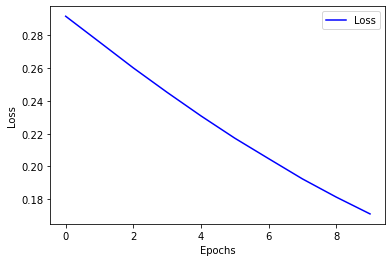

In [29]:
loss = history.history['loss']
val_loss = len(history.history['val_loss'])

acc = history.history['acc']
val_acc = len(history.history['val_acc'])

epochs = range(len(history.history['loss']))

plt.plot(epochs, loss, 'b', label = 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot Training & Validation accuracy

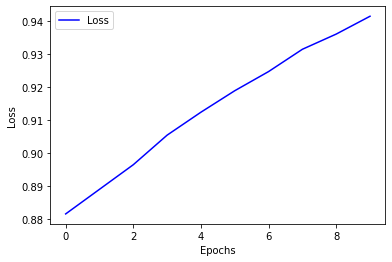

In [30]:
loss = history.history['loss']
val_loss = len(history.history['val_loss'])

acc = history.history['acc']
val_acc = len(history.history['val_acc'])

epochs = range(len(history.history['loss']))

plt.plot(epochs, acc, 'b', label = 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()